**Contents**:
- [Essentials](#Essentials)
    - Packages and modules
    - Functions
    - Classes
- [Data exploration](#Data-exploration)
    - Loading data
    - Operations
        - Subsetting
        - Reshaping
        - Filtering
        - Adding features
        - Grouping and aggregation
        - Getting statistics
- [Basic visualization](#Basic-visualization)
- [Miscellaneous](#Miscellaneous) (magic functions)

# Essentials

## Load packages

### Default

In [1]:
import time # for timing performance

### Data science-related packages

In [3]:
# !pip install scikit-learn
# !pip install numpy pandas matplotlib scipy

In [4]:
import numpy as np # ----> aliasing (nicknaming) a package
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt # ----> aliasing a subpackage
# import pandas.DataFrame as DF # ---> same as above but may not work if it's not a package
from pandas import DataFrame as DF # ---> aliasing a class name

### Modules

In [5]:
from config import * # ----> import every name from the module into the global namespace using `*`

Hello, you have successfully imported the project configuration module!


## Functions

In [6]:
def wait(interval: int):
    """ Wait for the given time (seconds) """ # ----> docstring (optional)
    time.sleep(interval)
    print(f"Thanks for your patience. You waited for {interval} s.")
    return interval

wait(0.25)

Thanks for your patience. You waited for 0.25 s.


0.25

In [7]:
?wait

Signature: wait(interval: int)
Docstring: Wait for the given time (seconds) 
File:      /var/folders/49/d1ff165x3n76n0f6jkysv4pc0000gn/T/ipykernel_21238/1837605329.py
Type:      function

### Understanding scopes

In [8]:
def immutable_arg_func(a):
    print("a=", a)
    a += 24
    print("a=", a)
    return a

a = 3
immutable_arg_func(a)
a

a= 3
a= 27


3

In [9]:
def mutable_arg_func(a: list):
    print("a=", a)
    a += [24]
    print("a=", a)
    return a

a = [10, 'python']
mutable_arg_func(a)
a

a= [10, 'python']
a= [10, 'python', 24]


[10, 'python', 24]

<p style="color: tomato; font-weight: 600">Can you list a few mutable data structures?</p>

## Classes

In [11]:
class Fruit:
    """A class for describing how fruits are beneficial to health."""

    def __init__(self, name, sweetness=0):
        self.name = name
        self.sweetness = sweetness
        self.introduce()

    def __repr__(self):
        return f"Fruit({self.name})"

    def introduce(self):
        print(f"I'm a {self}. My sweetness is {self.sweetness}.")

In [12]:
mango = Fruit("mango", 20)
apple = Fruit("apple", 60)

I'm a Fruit(mango). My sweetness is 20.
I'm a Fruit(apple). My sweetness is 60.


In [13]:
apple.sweetness = 95

In [14]:
apple.introduce()

I'm a Fruit(apple). My sweetness is 95.


```instance.method(...) == method(instance, ...)```

```apple.introduce(...) == introduce(apple, ...)```

# Data exploration

## Python vs numpy vs pandas

<img src="https://devopedia.org/images/article/304/4728.1610253789.png" width=700>

<img src="https://www.w3resource.com/w3r_images/python-numpy-image-exercise-168.svg">

## Loading data

In [18]:
%pwd

'/Users/rv/Box Sync/DATA SCIENCE FOR SMART CITIES _ FALL  2020/PYTHON SESSIONS'

### Numpy

See numpy reference: [loadtxt()](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)

In [23]:
years = np.loadtxt("data/programming_languages.csv", delimiter=',', skiprows=1, usecols=[0])
years

array([1951., 1952., 1954., 1955., 1957., 1957., 1958., 1958., 1959.,
       1959., 1959., 1962., 1962., 1962., 1963., 1964., 1964., 1964.,
       1966., 1967., 1968., 1969., 1970., 1970., 1972., 1972., 1972.,
       1973., 1975., 1978., 1980., 1983., 1984., 1984., 1984., 1985.,
       1986., 1986., 1986., 1987., 1988., 1988., 1989., 1990., 1991.,
       1991., 1993., 1993., 1994., 1995., 1995., 1995., 1995., 1995.,
       1995., 1997., 2000., 2001., 2001., 2002., 2003., 2003., 2005.,
       2006., 2007., 2009., 2010., 2011., 2011., 2011., 2011., 2012.,
       2014.])

### Pandas

See pandas reference: [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [24]:
df = pd.read_csv("data/programming_languages.csv")
df

,year,language
0,1951,Regional Assembly Language
1,1952,Autocode
2,1954,IPL
3,1955,FLOW-MATIC
4,1957,FORTRAN
...,...,...
68,2011,Kotlin
69,2011,Red
70,2011,Elixir
71,2012,Julia


In [25]:
df.values

array([[1951, 'Regional Assembly Language'],
       [1952, 'Autocode'],
       [1954, 'IPL'],
       [1955, 'FLOW-MATIC'],
       [1957, 'FORTRAN'],
       [1957, 'COMTRAN'],
       [1958, 'LISP'],
       [1958, 'ALGOL 58'],
       [1959, 'FACT'],
       [1959, 'COBOL'],
       [1959, 'RPG'],
       [1962, 'APL'],
       [1962, 'Simula'],
       [1962, 'SNOBOL'],
       [1963, 'CPL'],
       [1964, 'Speakeasy'],
       [1964, 'BASIC'],
       [1964, 'PL/I'],
       [1966, 'JOSS'],
       [1967, 'BCPL'],
       [1968, 'Logo'],
       [1969, 'B'],
       [1970, 'Pascal'],
       [1970, 'Forth'],
       [1972, 'C'],
       [1972, 'Smalltalk'],
       [1972, 'Prolog'],
       [1973, 'ML'],
       [1975, 'Scheme'],
       [1978, 'SQL '],
       [1980, 'C++ '],
       [1983, 'Ada'],
       [1984, 'Common Lisp'],
       [1984, 'MATLAB'],
       [1984, 'dBase III'],
       [1985, 'Eiffel'],
       [1986, 'Objective-C'],
       [1986, 'LabVIEW '],
       [1986, 'Erlang'],
       [1987, 'Perl'],

## Fundamental operations

### Subsetting

In [26]:
years[20:26]

array([1968., 1969., 1970., 1970., 1972., 1972.])

In [29]:
years[23:25] = [1914, 1939]

In [30]:
years[20: 26]

array([1968., 1969., 1970., 1914., 1939., 1972.])

In [31]:
years.dtype

dtype('float64')

In [32]:
years.astype(int)

array([1951, 1952, 1954, 1955, 1957, 1957, 1958, 1958, 1959, 1959, 1959,
       1962, 1962, 1962, 1963, 1964, 1964, 1964, 1966, 1967, 1968, 1969,
       1970, 1914, 1939, 1972, 1972, 1973, 1975, 1978, 1980, 1983, 1984,
       1984, 1984, 1985, 1986, 1986, 1986, 1987, 1988, 1988, 1989, 1990,
       1991, 1991, 1993, 1993, 1994, 1995, 1995, 1995, 1995, 1995, 1995,
       1997, 2000, 2001, 2001, 2002, 2003, 2003, 2005, 2006, 2007, 2009,
       2010, 2011, 2011, 2011, 2011, 2012, 2014])

In [34]:
years - 1900

array([ 51.,  52.,  54.,  55.,  57.,  57.,  58.,  58.,  59.,  59.,  59.,
        62.,  62.,  62.,  63.,  64.,  64.,  64.,  66.,  67.,  68.,  69.,
        70.,  14.,  39.,  72.,  72.,  73.,  75.,  78.,  80.,  83.,  84.,
        84.,  84.,  85.,  86.,  86.,  86.,  87.,  88.,  88.,  89.,  90.,
        91.,  91.,  93.,  93.,  94.,  95.,  95.,  95.,  95.,  95.,  95.,
        97., 100., 101., 101., 102., 103., 103., 105., 106., 107., 109.,
       110., 111., 111., 111., 111., 112., 114.])

In [35]:
df.dtypes

year         int64
language    object
dtype: object

In [39]:
df["year"] # ---> use for clarity and safety, though it can be verbose
df.year # ---> use for simplicity, though sometimes it can be problematic

0     1951
1     1952
2     1954
3     1955
4     1957
      ... 
68    2011
69    2011
70    2011
71    2012
72    2014
Name: year, Length: 73, dtype: int64

In [40]:
df.year.values

array([1951, 1952, 1954, 1955, 1957, 1957, 1958, 1958, 1959, 1959, 1959,
       1962, 1962, 1962, 1963, 1964, 1964, 1964, 1966, 1967, 1968, 1969,
       1970, 1970, 1972, 1972, 1972, 1973, 1975, 1978, 1980, 1983, 1984,
       1984, 1984, 1985, 1986, 1986, 1986, 1987, 1988, 1988, 1989, 1990,
       1991, 1991, 1993, 1993, 1994, 1995, 1995, 1995, 1995, 1995, 1995,
       1997, 2000, 2001, 2001, 2002, 2003, 2003, 2005, 2006, 2007, 2009,
       2010, 2011, 2011, 2011, 2011, 2012, 2014])

In [45]:
df[["language", "year"]]

,language,year
0,Regional Assembly Language,1951
1,Autocode,1952
2,IPL,1954
3,FLOW-MATIC,1955
4,FORTRAN,1957
...,...,...
68,Kotlin,2011
69,Red,2011
70,Elixir,2011
71,Julia,2012


#### Note: Pandas index
Special construct in pandas used to deal with identifiers

In [46]:
df.index

RangeIndex(start=0, stop=73, step=1)

In [50]:
df.loc[23: 30] # for index-based subsetting
df.iloc[23: 30] # for location-based subsetting

,year,language
23,1970,Forth
24,1972,C
25,1972,Smalltalk
26,1972,Prolog
27,1973,ML
28,1975,Scheme
29,1978,SQL


In [53]:
df_indexed = df.set_index('year')
df_indexed

,language
year,
1951,Regional Assembly Language
1952,Autocode
1954,IPL
1955,FLOW-MATIC
1957,FORTRAN
...,...
2011,Kotlin
2011,Red
2011,Elixir


In [54]:
df_indexed.loc[[1957, 1980]]

,language
year,
1957,FORTRAN
1957,COMTRAN
1980,C++


In [55]:
df_indexed.iloc[23: 30] # for location-based subsetting

,language
year,
1970,Forth
1972,C
1972,Smalltalk
1972,Prolog
1973,ML
1975,Scheme
1978,SQL


### Reshaping

In [57]:
years.shape

(73,)

In [58]:
years[:10].shape

(10,)

In [60]:
years[:10].reshape((-1, 5))

array([[1951., 1952., 1954., 1955., 1957.],
       [1957., 1958., 1958., 1959., 1959.]])

In [61]:
years[:10].reshape((-1, 2)).T # --> transposing

array([[1951., 1954., 1957., 1958., 1959.],
       [1952., 1955., 1957., 1958., 1959.]])

In [62]:
df

,year,language
0,1951,Regional Assembly Language
1,1952,Autocode
2,1954,IPL
3,1955,FLOW-MATIC
4,1957,FORTRAN
...,...,...
68,2011,Kotlin
69,2011,Red
70,2011,Elixir
71,2012,Julia


In [63]:
df.T # --> transposing

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
year,1951,1952,1954,1955,1957,1957,1958,1958,1959,1959,...,2006,2007,2009,2010,2011,2011,2011,2011,2012,2014
language,Regional Assembly Language,Autocode,IPL,FLOW-MATIC,FORTRAN,COMTRAN,LISP,ALGOL 58,FACT,COBOL,...,PowerShell,Clojure,Go,Rust,Dart,Kotlin,Red,Elixir,Julia,Swift


In [64]:
df_indexed.T

year,1951,1952,1954,1955,1957,1957,1958,1958,1959,1959,...,2006,2007,2009,2010,2011,2011,2011,2011,2012,2014
language,Regional Assembly Language,Autocode,IPL,FLOW-MATIC,FORTRAN,COMTRAN,LISP,ALGOL 58,FACT,COBOL,...,PowerShell,Clojure,Go,Rust,Dart,Kotlin,Red,Elixir,Julia,Swift


In [65]:
df_reset = df.reset_index(); df_reset

,index,year,language
0,0,1951,Regional Assembly Language
1,1,1952,Autocode
2,2,1954,IPL
3,3,1955,FLOW-MATIC
4,4,1957,FORTRAN
...,...,...,...
68,68,2011,Kotlin
69,69,2011,Red
70,70,2011,Elixir
71,71,2012,Julia


In [66]:
df_reset.pivot(index='language', columns='year')

index                                                ...  \
year               1951 1952 1954 1955 1957 1958 1959  1962 1963 1964  ...   
language                                                               ...   
ALGOL 58            NaN  NaN  NaN  NaN  NaN  7.0  NaN   NaN  NaN  NaN  ...   
APL                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  11.0  NaN  NaN  ...   
ActionScript        NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...   
Ada                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...   
Ada 95              NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...   
...                 ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
Swift               NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...   
Tcl                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...   
Visual Basic        NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...   
Wolfram Language    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...   
dBase III           NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...   

                                                                      
year              2002 2003 2005 2006 2007 2009 2010 2011 2012  2014  
language                                                              
ALGOL 58           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
APL                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
ActionScript       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
Ada                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
Ada 95             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
...                ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
Swift              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  72.0  
Tcl                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
Visual Basic       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
Wolfram Language   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
dBase III          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[73 rows x 45 columns]

### Querying/filtering

In [67]:
years % 3 == 0 # get years divisible by 3

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False])

In [68]:
years[years % 3 == 0].astype(int)

array([1959, 1959, 1959, 1962, 1962, 1962, 1968, 1914, 1980, 1983, 1986,
       1986, 1986, 1989, 1995, 1995, 1995, 1995, 1995, 1995, 2001, 2001,
       2007, 2010])

In [69]:
df[df['year'] % 3 == 0]

,year,language
8,1959,FACT
9,1959,COBOL
10,1959,RPG
11,1962,APL
12,1962,Simula
13,1962,SNOBOL
20,1968,Logo
30,1980,C++
31,1983,Ada
36,1986,Objective-C


In [70]:
df.query('1990 <= year <= 2000')

,year,language
43,1990,Haskell
44,1991,Python
45,1991,Visual Basic
46,1993,Lua
47,1993,R
48,1994,CLOS
49,1995,Ruby
50,1995,Ada 95
51,1995,Java
52,1995,Delphi


### Adding columns

In [72]:
df['21st_century'] = df['year'] >= 2000
df['decade'] = (df['year'] // 10) * 10
df

,year,language,21st_century,decade
0,1951,Regional Assembly Language,False,1950
1,1952,Autocode,False,1950
2,1954,IPL,False,1950
3,1955,FLOW-MATIC,False,1950
4,1957,FORTRAN,False,1950
...,...,...,...,...
68,2011,Kotlin,True,2010
69,2011,Red,True,2010
70,2011,Elixir,True,2010
71,2012,Julia,True,2010


In [73]:
df.assign(starts_with_f = df.language.str.startswith('F'))

,year,language,21st_century,decade,starts_with_f
0,1951,Regional Assembly Language,False,1950,False
1,1952,Autocode,False,1950,False
2,1954,IPL,False,1950,False
3,1955,FLOW-MATIC,False,1950,True
4,1957,FORTRAN,False,1950,True
...,...,...,...,...,...
68,2011,Kotlin,True,2010,False
69,2011,Red,True,2010,False
70,2011,Elixir,True,2010,False
71,2012,Julia,True,2010,False


### Grouping and aggregation

In [75]:
df['21st_century'].unique()

array([False,  True])

In [77]:
grouped = df.groupby('21st_century')
grouped

In [78]:
grouped.size() # computes the total no. of rows in each group

21st_century
False    56
True     17
dtype: int64

In [79]:
df['21st_century'].value_counts()

False    56
True     17
Name: 21st_century, dtype: int64

In [80]:
df['decade'].value_counts()

1980    13
1990    13
1950    11
1960    11
2000    10
1970     8
2010     7
Name: decade, dtype: int64

In [90]:
df2 = df.groupby('year').size().rename('num_languages').reset_index().T; df2

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
year,1951,1952,1954,1955,1957,1958,1959,1962,1963,1964,...,2002,2003,2005,2006,2007,2009,2010,2011,2012,2014
num_languages,1,1,1,1,2,2,3,3,1,3,...,1,2,1,1,1,1,1,4,1,1


### Getting statistics

In [82]:
df.describe()

,year,decade
count,73.000000,73.000000
mean,1982.986301,1978.767123
std,18.384393,19.216978
min,1951.000000,1950.000000
25%,1966.000000,1960.000000
50%,1986.000000,1980.000000
75%,1995.000000,1990.000000
max,2014.000000,2010.000000


In [83]:
df.language.describe()

count                             73
unique                            73
top       Regional Assembly Language
freq                               1
Name: language, dtype: object

# Basic visualization

In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # fancy wrapper for matplotlib

In [85]:
df_indexed.head(3)

,language
year,
1951,Regional Assembly Language
1952,Autocode
1954,IPL


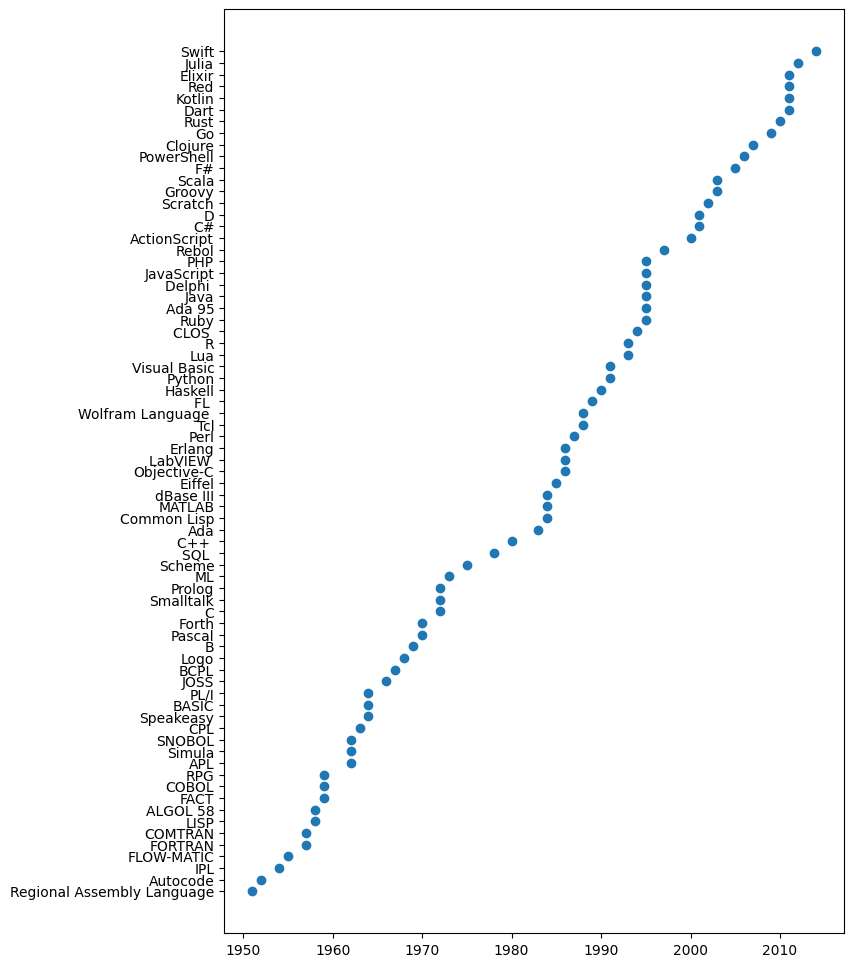

In [88]:
plt.figure(figsize=(8, 12))
plt.scatter(df['year'], df['language'])

Text(0, 0.5, 'No. of languages')

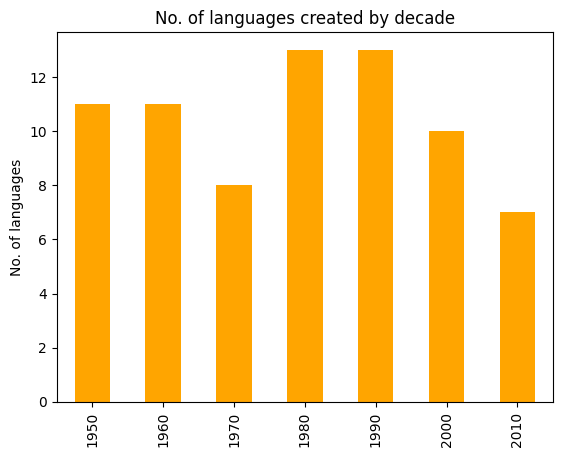

In [91]:
fig = plt.figure()
df['decade'].value_counts().sort_index().plot.bar(color='orange')
plt.title('No. of languages created by decade')
plt.ylabel('No. of languages')

---
# Miscellaneous

## Magic functions
- Special functions in Jupyter/iPython that input statements rather than arguments in parentheses.
- Start with the **`%`** symbol.
- Lots of in-built magics ([see complete list](https://ipython.readthedocs.io/en/stable/interactive/magics.html))

### Inline magics

In [ ]:
%lsmagic # ---> list currently available magic functions

In [ ]:
%time wait(2) # ---> %time: record runtime, esp. useful for long operations

In [ ]:
%timeit wait(0.4) # ---> for recording performance for multiple runs
%timeit -n 3 -r 2 wait(0.5) # ---> specify the no. of runs

In [ ]:
%env # list environment variables
%env PATH # ---> get the value of a specific variable
%env TEMP_PATH=~/.temp # ---> set the value of a specific variable

In [ ]:
%run config.py # ---> run a file inside this Jupyter session

In [ ]:
%who # ---> list all variables in the current namespace
# vars(), globals(), locals() # ---> try these functions as well and read how they work

### Cell magics

In [ ]:
%%time
wait(1.3)
print("Wow, you're very patient!")

In [ ]:
%%html
<html>
<script>
function myFunction() {document.getElementById("my-btn").innerHTML = "Sad luck 😢"}
</script>
<h2 style="color: orange">Mic testing</h2>
<button id="my-btn" style="padding: 10px; font-size: 18px"
onclick="myFunction()">Click here to win $1,000,000!<button>
</html>

In [ ]:
%%markdown
Hello, this is markdown. For example, this is an equation: $$E = mc^2$$

This is the Jupyter version of markdown. Here's the same equation as above: $$E=mc^2$$